## Ex2

In [2]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
import itertools as it
def box3d(n=16):
    points = []
    N = tuple(np.linspace(-1, 1, n))
    for i, j in [(-1, -1), (-1, 1), (1, 1), (0, 0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    return np.hstack(points)/2

In [4]:
def Pi(x: np.array):
    """
    Converts homogeneous to inhomogeneous coordinates
    Args:
        x (np.array) homogeneous coordinate

    Return:
        np.array converted inhomogeneous coordinate
    """

    return x[:-1] / x[-1]


def Piinv(x: np.array):
    """
    Converts inhomogeneous to homogeneous coordinates

    Args:
        x (np.array) inhomogeneous coordinate

    Return:
        np.array converted homogeneous coordinate
    """
    if x.ndim == 1:
        return np.concatenate((x, np.ones(1)))
    return np.vstack((x, np.ones((1, x.shape[1]))))

In [5]:
box = box3d(16)
Q = Piinv(box)

In [6]:
f = 600
alpha = 1
beta = 0
delta_x, delta_y = 400, 400


δx and δy are the coordinates of the principal point (the optical center) in pixels.
The principal point (δx,δy) is typically at the center of the image. Therefore, the total resolution of the image can be estimated by doubling the principal point coordinates:

Width (in pixels): 
2×δx=2×400=800 pixels.

Height (in pixels): 
2×δy=2×400=800 pixels.

In [7]:
def projectpoints(K: np.array, R: np.array, t: np.array, Q: np.array):
    """
    Obtains projected 2D coordinates from world coordinates

    Args:
        K (np.array) intrinsics matrix
        R (np.array) extrinsic rotation matrix
        t (np.array) extrinsic translation matrix
        Q (np.array) homogeneous input points in world coordinates

    Return:
        np.array projected 2D points
    """
    # Projection matrix = K[R t] Q
    extrinsics = np.concatenate((R, t), axis=1)
    return K @ extrinsics @ Q

In [8]:
def Pi(x: np.array):
    """
    Converts homogeneous to inhomogeneous coordinates
    Args:
        x (np.array) homogeneous coordinate

    Return:
        np.array converted inhomogeneous coordinate
    """

    return x[:-1] / x[-1]


def Piinv(x: np.array):
    """
    Converts inhomogeneous to homogeneous coordinates

    Args:
        x (np.array) inhomogeneous coordinate

    Return:
        np.array converted homogeneous coordinate
    """
    if x.ndim == 1:
        return np.concatenate((x, np.ones(1)))
    return np.vstack((x, np.ones((1, x.shape[1]))))

In [9]:
R = np.eye(3)
t = np.asarray([0,0.2,1.5]).reshape((3, 1))
K = np.asarray([[f, beta*f, delta_x ], [0, alpha*f, delta_y], [0, 0, 1]])
point = np.asarray([-0.5, -0.5, -0.5]).reshape((3, 1))
projectpoints(K, R, t, Piinv(point))

array([[100.],
       [220.],
       [  1.]])

## Ex 2.2

In [10]:
x = np.asarray([1,2, 3]).reshape((3, 1))
Pi

<function __main__.Pi(x: <built-in function array>)>

In [11]:
def dist(point: np.array, distCoeffs: np.array, poly_func):
    """
    Returns a distorted version of x based on radial distortion
    With polynomial coefficients in distCoeffs
    
    Args:
        point (np.array): Input inhomogeneous 2d points
        distCoeffs (np.array): radial distortion polynomial coefficients
        poly_func (function): Function that computes polynomial 

    Return:
        np.array of distorted image in inhomogeneous coordinates
    """
    point_x = point[0]
    point_y = point[1]
    squared = np.sqrt(point_x ** 2 + point_y ** 2)
    print(f"Undergoing distortion with coeffs: {distCoeffs}")
    distortion_factor = poly_func(squared, distCoeffs)
    distorted_point = point * distortion_factor
    return distorted_point

distCoeffs = np.asarray([0.1, 0.01])
point = np.asarray([1.0, 2.0])
poly_lambda = lambda squared, coeffs: 1 + coeffs[0] * squared + coeffs[1] * (squared**2)
distorted_point = dist(point, distCoeffs, poly_lambda)
distorted_point

Undergoing distortion with coeffs: [0.1  0.01]


array([1.2736068, 2.5472136])

In [12]:
def projectpoints(K: np.array, R: np.array, t: np.array, distCoeffs: np.array, Q: np.array):
    """
    Obtains projected 2D coordinates from world coordinates

    Args:
        K (np.array): intrinsics matrix
        R (np.array): extrinsic rotation matrix
        t (np.array): extrinsic translation matrix
        distCoeffs: (np.array) distortion coefficient matrix
        Q (np.array): homogeneous input points in world coordinates

    Return:
        np.array projected 2D points with distortion
    """
    # Projection matrix = K[R t] Q
    extrinsics = np.concatenate((R, t), axis=1)
    poly_lambda = (
        lambda squared, coeffs: 1 + coeffs[0] * (squared ** 2)
    )
    distorted_point = dist(Pi(extrinsics @ Q), distCoeffs, poly_lambda)
    print(f"distorted_point is {distorted_point}")
    return K @ Piinv(distorted_point)

In [13]:
distCoeffs = np.asarray([-0.2])
point = np.asarray([-0.5, -0.5, -0.5]).reshape((3, 1))
projectpoints(K, R, t, distCoeffs, Piinv(point))

Undergoing distortion with coeffs: [-0.2]
distorted_point is [[-0.466 ]
 [-0.2796]]


array([[120.4 ],
       [232.24],
       [  1.  ]])

In [14]:
distorted_box = projectpoints(K, R, t, distCoeffs, Q)
distorted_box.shape


Undergoing distortion with coeffs: [-0.2]
distorted_point is [[-0.466      -0.40925926 -0.35020741 -0.2892     -0.22659259 -0.16274074
  -0.098      -0.03272593  0.03272593  0.098       0.16274074  0.22659259
   0.2892      0.35020741  0.40925926  0.466      -0.466      -0.46955556
  -0.47222222 -0.474      -0.47488889 -0.47488889 -0.474      -0.47222222
  -0.46955556 -0.466      -0.46155556 -0.45622222 -0.45       -0.44288889
  -0.43488889 -0.426      -0.466      -0.44073486 -0.41782007 -0.39699074
  -0.378007   -0.36065625 -0.34475219 -0.33013242 -0.31665571 -0.30419922
  -0.292656   -0.28193275 -0.27194787 -0.26262983 -0.2539157  -0.24575
  -0.24575    -0.24619444 -0.24652778 -0.24675    -0.24686111 -0.24686111
  -0.24675    -0.24652778 -0.24619444 -0.24575    -0.24519444 -0.24452778
  -0.24375    -0.24286111 -0.24186111 -0.24075     0.466       0.46955556
   0.47222222  0.474       0.47488889  0.47488889  0.474       0.47222222
   0.46955556  0.466       0.46155556  0.45622222  0.4

(3, 240)

In [15]:
def plot_projections(x: np.array):
    """
    Plots projections

    Args:
        x (np.array) homogeneous coordinate to be plotted

    """
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel("X")
    ax.set_xlabel("Y")
    ax.set_xlabel("Z")
    ax.scatter(x[0], x[1], x[2])

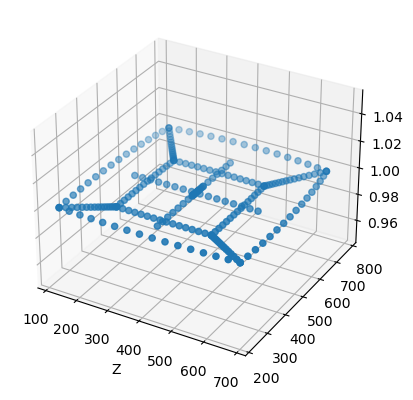

In [16]:
plot_projections(distorted_box)

## Ex 2.3

In [17]:
import cv2
input_folder = "images/"
image_name = "gopro_robot.jpg"
img = cv2.imread(input_folder + image_name)
img.shape

(1080, 1920, 3)

In [18]:
window_name = "gopro robot image"
cv2.imshow(window_name, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
height = img.shape[0]
width = img.shape[1]
focal_length = 0.455732 * width
alpha = 1
beta = 0
delta_x = width // 2
delta_y = height // 2
K = np.asarray(
    [
        [focal_length, beta * focal_length, delta_x],
        [0, alpha * focal_length, delta_y],
        [0, 0, 1],
    ]
)
K

array([[875.00544,   0.     , 960.     ],
       [  0.     , 875.00544, 540.     ],
       [  0.     ,   0.     ,   1.     ]])

## Ex 2.4

Having the RGB-value of every (integer) pixel location (p) in the undistorted image is the same as having the image.

* However, we only know the RGB-value at every location (pd) in the distorted image

* Use dist(·) and K to find pd from p
* pd = KΠ^−1 (
dist (Π (K^−1p)))
* Use bilinear interpolation to compute the RGB-value in the
distorted image at the (non-integer) point pd.
* Not necessary to invert the distortion function!

The intrinsics matrix K maps normalized coordinates to pixel coordinates:

We invert the mapping K^-1 @ p to go back to the points in the camera coordinate system
Recall: K @ p gives the pixels in the image plane. p itself is in the camera coordinates are expressed in meters etc.

Note that in the camera coordinate system, the values between the undistorted and distorted are the <b> same <b>
So we just generate a newly distorted based on our distortion model and then create a map between undistorted to the newly generated distorted image

https://stackoverflow.com/questions/46520123/how-do-i-use-opencvs-remap-function

This is just a simple misunderstanding of the documentation, and I don't blame you---it took me a few fumblings to understand it, too. The docs are clear, but this function probably doesn't work in the way you expect; in fact, it works in the opposite direction from what I expected at first.

What remap() doesn't do is take the coordinates of your source image, transform the points, and then interpolate. What remap() does do is, for every pixel in the destination image, lookup where it comes from in the source image, and then assigns an interpolated value. It needs to work this way since, in order to interpolate, it needs to look at the values around the source image at each pixel. Let me expand (might repeat myself a bit, but don't take it the wrong way).

In [20]:
def undistortImage(img: np.array, K: np.array, distCoeffs: np.array):
    """
    Undistorts image, main principle is as follows:
    1. Create an empty grid to store all the mappings from camera coordinate system -> distorted pixel coordinates
    2. Get image in terms of camera coordinate by multiplying grid with the inverse of camera intrinsics
    3. Distort the grid with the given radial distortion polynomial and distortion coefficients 
       Result would give the mapping from camera coordinate -> Distorted pixel coordinate 
    4. Use remap() with interpolation for non integer pixel coordinates

    Basically create an empty canvas, let it go through all the transformations (e.g. camera -> pixel + distortion), 
    then find mapping between this transformed canvas and the original distorted image

    Args:
        img (np.array): distorted image
        K (np.array): intrinsics matrix
        distCoeffs (np.array): distortion coefficient matrix

    Return:
        im_undistorted (np.array): undistorted image
    """
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    # Stack both and add ones to make p homogeneous
    p = np.stack((x, y, np.ones(x.shape))).reshape(3, -1)
    q = np.linalg.inv(K) @ p
    poly_lambda = lambda squared, coeffs: 1 + coeffs[0] * (squared**2) + coeffs[1] * (squared ** 4) + coeffs[2] * (squared ** 6)
    q_d = dist(Pi(q), distCoeffs, poly_lambda)
    p_d = K @ Piinv(q_d)
    x_d = p_d[0].reshape(x.shape).astype(np.float32)
    y_d = p_d[1].reshape(y.shape).astype(np.float32)
    assert (p_d[2] == 1).all(), "You did a mistake somewhere"
    im_undistorted = cv2.remap(img, x_d, y_d, cv2.INTER_LINEAR)
    return im_undistorted

In [21]:
distCoeffs = [-0.245031, 0.071524, -0.00994978]
img_undistorted = undistortImage(img, K, distCoeffs)
cv2.imshow("undisorted image", img_undistorted)
cv2.waitKey(0)
cv2.destroyAllWindows()

Undergoing distortion with coeffs: [-0.245031, 0.071524, -0.00994978]


## Ex 2.5 Homographies

In [22]:
p_2a = np.asarray([1, 1]).reshape((2, 1))
p_2b = np.asarray([0, 3]).reshape((2, 1))
p_2c = np.asarray([2, 3]).reshape((2, 1))
p_2d = np.asarray([2, 4]).reshape((2, 1))
all = np.hstack((p_2a, p_2b, p_2c,p_2d))
H = np.asarray([[-2, 0, 1], [1, -2, 0], [0, 0, 3]])
all, H.shape


(array([[1, 0, 2, 2],
        [1, 3, 3, 4]]),
 (3, 3))

In [23]:
Pi(H @ Piinv(all))

array([[-0.33333333,  0.33333333, -1.        , -1.        ],
       [-0.33333333, -2.        , -1.33333333, -2.        ]])

## Ex 2.6

In [24]:
q1 = all
q2 = Pi(H @ Piinv(all))
 # Ensure q1 and q2 are in homogeneous coordinates (3xN)
if q1.shape[0] == 2:
    q1 = Piinv(q1)
if q2.shape[0] == 2:
    q2 = Piinv(q2)
num_points = q1.shape[1]
# for i in range(num_points):
#     q1_skew = skew(q1[i])
#     print(q1_skew.shape)
#     B_i = np.kron(q2.T[i], q1_skew)
#     print(B_i.shape)
q1, q2

(array([[1., 0., 2., 2.],
        [1., 3., 3., 4.],
        [1., 1., 1., 1.]]),
 array([[-0.33333333,  0.33333333, -1.        , -1.        ],
        [-0.33333333, -2.        , -1.33333333, -2.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ]]))

In [25]:
def skew(x: np.array):
    """
    This function returns a numpy array with the skew symmetric cross product matrix for vector.
    the skew symmetric cross product matrix is defined such that
    np.cross(a, b) = np.dot(skew(a), b)
    https://stackoverflow.com/questions/36915774/form-numpy-array-from-possible-numpy-array
    
    Args:
        x (np.array): 1x3 matrix

    Return:
        s (np.array): 3x3 skew symmetrix matrix for cross product
    """
    vector = x.ravel()
    s = np.asarray([[0, -vector[2], vector[1]], [vector[2], 0, -vector[0]], [-vector[1], vector[0], 0]])
    return s

In [26]:
def hest(q1: np.array, q2: np.array):
    """
    Obtains estimated homography using linear algorithm

    Args:
        q1 (np.array): first set of points in 2D coordinates
        q2 (np.array): second set of points in 2D coordinates

    Return:
        H (np.array): Estimated homography matrix
    """
    A = []
    # Ensure q1 and q2 are in homogeneous coordinates (3xN)
    if q1.shape[0] == 2:
        q1 = Piinv(q1)
    if q2.shape[0] == 2:
        q2 = Piinv(q2)
    num_points = q1.shape[1]
    for i in range(num_points):
        # x1, y1, w = q1[:, i].T
        # x2, y2, wp = q2[:, i].T
        # B_check = np.asarray([[0, -x2, x2*y1, 0, -y2, y2*y1, 0, -1, y1],
        #            [x2, 0, -x2*x1, y2, 0, -y2*x1, 1, 0, -x1],
        #            [-x2*y1, x2*x1, 0, -y2*y1, y2*x1, 0, -y1, x1, 0]])
        # x1, y1, w1 = q1[:, i]  # First set of points
        # x2, y2, w2 = q2[:, i]  # Second set of points

        # Construct two rows per correspondence
        # A.append([-x1, -y1, -w1,  0,  0,  0, x2*x1, x2*y1, x2*w1])
        # A.append([0,  0,  0, -x1, -y1, -w1, y2*x1, y2*y1, y2*w1])
        q2_skew = skew(q2[:, i])
        B_i = np.kron(
            q1[:, i].reshape(1, 3),
            q2_skew,
            
        )
        # print((B_check == B_i).all())
        A.append(B_i)
    B = np.vstack(A)
    U, S, VT = np.linalg.svd(B)
    H = VT[-1, :].reshape(3, 3).T
    return H
H_result = hest(q1, q2)
Original_H = np.asarray([[-2, 0, 1], [1, -2, 0], [0, 0, 3]])
H_result * np.linalg.norm(Original_H) / np.linalg.norm(H_result) , Original_H

(array([[-2.00000000e+00, -9.68769373e-16,  1.00000000e+00],
        [ 1.00000000e+00, -2.00000000e+00, -1.61880939e-15],
        [-1.74427509e-15,  2.62685751e-15,  3.00000000e+00]]),
 array([[-2,  0,  1],
        [ 1, -2,  0],
        [ 0,  0,  3]]))

## Ex 2.7


In [27]:
def normalize2d(x: np.array, y: np.array):
    """
    This function finds the transformation T such that qih =
    T pih, has mean [0, 0] and standard deviation [1, 1] for all qi.

        Args:
            x (np.array): first set of data points
            y (np.array): second set of data points

        Return:
            T (np.array): Transformation to normalize data points
    """
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_deviation_x = np.std(x)
    std_deviation_y = np.std(y)
    T_inverse = np.asarray([[std_deviation_x, 0, mean_x], [0, std_deviation_y, mean_y], [0, 0, 1]])
    return np.linalg.inv(T_inverse) 


In [28]:
# Test cases
def test_normalize2d():
    # Test Case 1: Simple Test Case (already centered and scaled)
    x1 = np.array([-1, 0, 1])
    y1 = np.array([-1, 0, 1])
    T1 = normalize2d(x1, y1)
    print("Test Case 1 - Transformation Matrix T:")
    print(T1)

    # Test Case 2: Non-Centered Points
    x2 = np.array([1, 2, 3])
    y2 = np.array([4, 5, 6])
    T2 = normalize2d(x2, y2)
    print("\nTest Case 2 - Transformation Matrix T:")
    print(T2)

    # Test Case 3: Non-Scaled Points
    x3 = np.array([-2, 0, 2])
    y3 = np.array([-3, 0, 3])
    T3 = normalize2d(x3, y3)
    print("\nTest Case 3 - Transformation Matrix T:")
    print(T3)

    # Test Case 4: Combined Test Case (neither centered nor scaled)
    x4 = np.array([10, 20, 30])
    y4 = np.array([40, 50, 60])
    T4 = normalize2d(x4, y4)
    print("\nTest Case 4 - Transformation Matrix T:")
    print(T4)


# Run the tests
test_normalize2d()

Test Case 1 - Transformation Matrix T:
[[1.22474487 0.         0.        ]
 [0.         1.22474487 0.        ]
 [0.         0.         1.        ]]

Test Case 2 - Transformation Matrix T:
[[ 1.22474487  0.         -2.44948974]
 [ 0.          1.22474487 -6.12372436]
 [ 0.          0.          1.        ]]

Test Case 3 - Transformation Matrix T:
[[0.61237244 0.         0.        ]
 [0.         0.40824829 0.        ]
 [0.         0.         1.        ]]

Test Case 4 - Transformation Matrix T:
[[ 0.12247449  0.         -2.44948974]
 [ 0.          0.12247449 -6.12372436]
 [ 0.          0.          1.        ]]


## Ex 2.8

In [29]:
q1 = all
q2 = Pi(H @ Piinv(all))
# Ensure q1 and q2 are in homogeneous coordinates (3xN)
# if q1.shape[0] == 2:
#     q1 = Piinv(q1)
# if q2.shape[0] == 2:
#     q2 = Piinv(q2)
# num_points = q1.shape[1]
# for i in range(num_points):
#     q1_skew = skew(q1[i])
#     print(q1_skew.shape)
#     B_i = np.kron(q2.T[i], q1_skew)
#     print(B_i.shape)
q1, q2
normalize2d(q1[0, :], q1[1, :] )

array([[ 1.20604538,  0.        , -1.50755672],
       [ 0.        ,  0.91766294, -2.52357307],
       [ 0.        ,  0.        ,  1.        ]])

In [30]:
def hest(q1: np.array, q2: np.array, normalize: bool):
    """
        Obtains estimated homography using linear algorithm

        Args:
            q1 (np.array): first set of points in 2D coordinates
            q2 (np.array): second set of points in 2D coordinates
            normalize (bool): Whether to normalize the points before estimating the homography

        Return:
            H (np.array): Estimated homography matrix
    """
    A = []
    T1 = np.eye(3)
    T2 = np.eye(3)
    if normalize:
        T1 = normalize2d(q1[0, :], q1[1, :])
        T2 = normalize2d(q2[0, :], q2[1, :])
    # Ensure q1 and q2 are in homogeneous coordinates (3xN)
    if q1.shape[0] == 2:
        q1 = Piinv(q1)
    if q2.shape[0] == 2:
        q2 = Piinv(q2)
    num_points = q1.shape[1]
    for i in range(num_points):
        # x1, y1, w = q1[:, i].T
        # x2, y2, wp = q2[:, i].T
        # B_check = np.asarray([[0, -x2, x2*y1, 0, -y2, y2*y1, 0, -1, y1],
        #            [x2, 0, -x2*x1, y2, 0, -y2*x1, 1, 0, -x1],
        #            [-x2*y1, x2*x1, 0, -y2*y1, y2*x1, 0, -y1, x1, 0]])
        # x1, y1, w1 = q1[:, i]  # First set of points
        # x2, y2, w2 = q2[:, i]  # Second set of points

        # Construct two rows per correspondence
        # A.append([-x1, -y1, -w1,  0,  0,  0, x2*x1, x2*y1, x2*w1])
        # A.append([0,  0,  0, -x1, -y1, -w1, y2*x1, y2*y1, y2*w1])
        q1_skew = skew(q1[:, i])
        B_i = np.kron(
            q1[:, i].reshape(1, 3),
            q2_skew,
        )
        # print((B_check == B_i).all())
        A.append(B_i)
    B = np.vstack(A)
    U, S, VT = np.linalg.svd(B)
    H = VT[-1, :].reshape(3, 3).T
    return np.linalg.inv(T1) @ H @ T2


H_result = hest(q1, q2, True)
Original_H = np.asarray([[-2, 0, 1], [1, -2, 0], [0, 0, 3]])
H_result, Original_H

(array([[ 0.44332171,  0.17962962, -0.01893762],
        [-0.98518437,  0.5499126 , -0.80271163],
        [-0.35824886, -0.14515893, -0.78082527]]),
 array([[-2,  0,  1],
        [ 1, -2,  0],
        [ 0,  0,  3]]))

In [31]:
plt.ginput

<function matplotlib.pyplot.ginput(n=1, timeout=30, show_clicks=True, mouse_add=<MouseButton.LEFT: 1>, mouse_pop=<MouseButton.RIGHT: 3>, mouse_stop=<MouseButton.MIDDLE: 2>)>

In [ ]:
import matplotlib

matplotlib.use("TkAgg")

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Load images
image_A = plt.imread("images/image_A.jpeg")
image_B = plt.imread("images/image_B.jpeg")


# Function to get clicked points
def get_points(image, title):
    plt.imshow(image)
    plt.title(title)
    points = plt.ginput(n=4, timeout=0)  # Click on 4 points
    plt.close()
    return np.array(points)


# Get points for image A and image B
points_A = get_points(image_A, "Click on the ×-marks in Image A")
points_B = get_points(image_B, "Click on the ×-marks in Image B")

print("Points in Image A:", points_A)
print("Points in Image B:", points_B)

KeyboardInterrupt: 

In [34]:
def warpImage(im, H):
    imWarp = cv2.warpPerspective(im, H, (im.shape[1], im.shape[0]))
    return imWarp
# It takes an image and a homography and returns the image warped with the homography.